# Pair occurence analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import sys
sys.path.append('../')
from helpers import *

data_path = './../../../data'

In [2]:
rb_dir = os.path.join(data_path, 'RateBeer')
rev_with_scores_rb = pd.read_pickle(os.path.join(rb_dir, 'rev_w_scores.pkl'))

In [3]:
def compute_pair_occ(df, pair_occ={}):
    for x in df:
        if len(x)<2:
            continue
        for i in range(len(x)-1):
            j = i+1
            while j < len(x):
                pair = x[i]+', '+x[j] if x[i] < x[j] else x[j]+', '+x[i]
                if pair in pair_occ.keys():
                    pair_occ[pair]+= 1
                else: 
                    pair_occ[pair]= 1
                j+=1
    return pair_occ

In [4]:
start_time = time.time()

pair_occ = compute_pair_occ(rev_with_scores_rb.stems)

print("--- %s seconds ---" % (time.time() - start_time))

--- 37.57983922958374 seconds ---


In [5]:
ba_dir = os.path.join(data_path, 'BeerAdvocate')
rev_with_scores_ba = pd.read_pickle(os.path.join(ba_dir, 'rev_w_scores.pkl'))

In [6]:
start_time = time.time()

pair_occ = compute_pair_occ(rev_with_scores_ba.stems, pair_occ=pair_occ)

print("--- %s seconds ---" % (time.time() - start_time))

--- 30.47440505027771 seconds ---


In [7]:
pair_occ = sorted(pair_occ.items(), key=lambda x:x[1] , reverse=True)

In [8]:
len(pair_occ)

32852

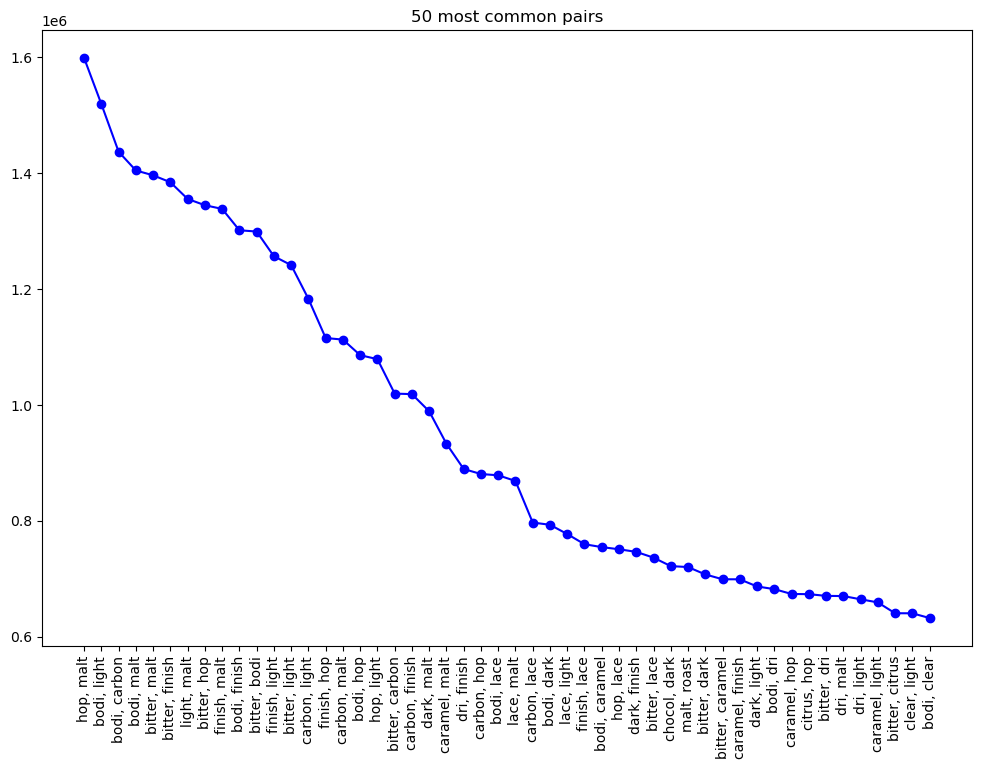

In [9]:
x_values = [t[0] for t in pair_occ[:50]]
y_values = [t[1] for t in pair_occ[:50]]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.title('50 most common pairs')
plt.xticks(rotation=90)
plt.show()



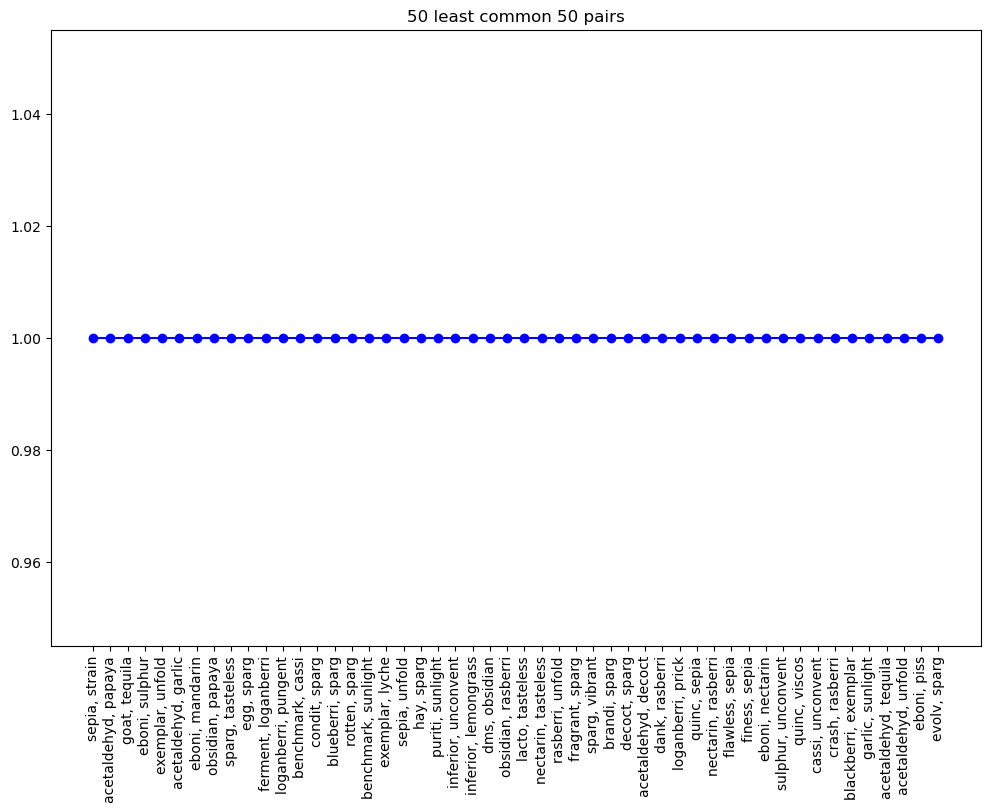

In [10]:
x_values = [t[0] for t in pair_occ[-50:]]
y_values = [t[1] for t in pair_occ[-50:]]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.title('50 least common 50 pairs')
plt.xticks(rotation=90)
plt.show()

### Analysis per category

In [11]:
expert_terms_stemmed =  get_exp_stems(data_path)

In [12]:
def compute_pair_occ_cat(df, expert_terms_stemmed, pair_occ_cat=None):
    if pair_occ_cat==None:
        pair_occ_cat = {cat: {} for cat in expert_terms_stemmed.keys()}
    for x in df:
        if len(x)<2:
            continue
        for i in range(len(x)-1):
            for cat in expert_terms_stemmed.keys():
                if x[i] in expert_terms_stemmed[cat]:
                    j = i+1
                    while j < len(x):
                        if x[j] in expert_terms_stemmed[cat]:
                            pair = x[i]+', '+x[j] if x[i] < x[j] else x[j]+', '+x[i]
                            if pair in pair_occ_cat[cat].keys():
                                pair_occ_cat[cat][pair]+= 1
                            else: 
                                pair_occ_cat[cat][pair]= 1
                        j+=1
    return pair_occ_cat

In [13]:
star_time = time.time()
pair_occ_cat = compute_pair_occ_cat(rev_with_scores_rb.stems, expert_terms_stemmed)

print("--- %s seconds ---" % (time.time() - start_time))

--- 136.9634349346161 seconds ---


In [14]:
star_time = time.time()
pair_occ_cat = compute_pair_occ_cat(rev_with_scores_ba.stems, expert_terms_stemmed, pair_occ_cat=pair_occ_cat)

print("--- %s seconds ---" % (time.time() - start_time))

--- 214.0796718597412 seconds ---


In [15]:
def print_50(dictionary, title='', first = True, semilog=False):
    if first:
        x_values = [t[0] for t in dictionary[:50]]
        y_values = [t[1] for t in dictionary[:50]]
    else:
        x_values = [t[0] for t in dictionary[-50:]]
        y_values = [t[1] for t in dictionary[-50:]]
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    if semilog:
        plt.yscale('log')
    plt.title(title + '50' +(' most ' if first else ' least ')+ 'common pairs')
    plt.xticks(rotation=90)
    plt.show()


Total pairs: 6739


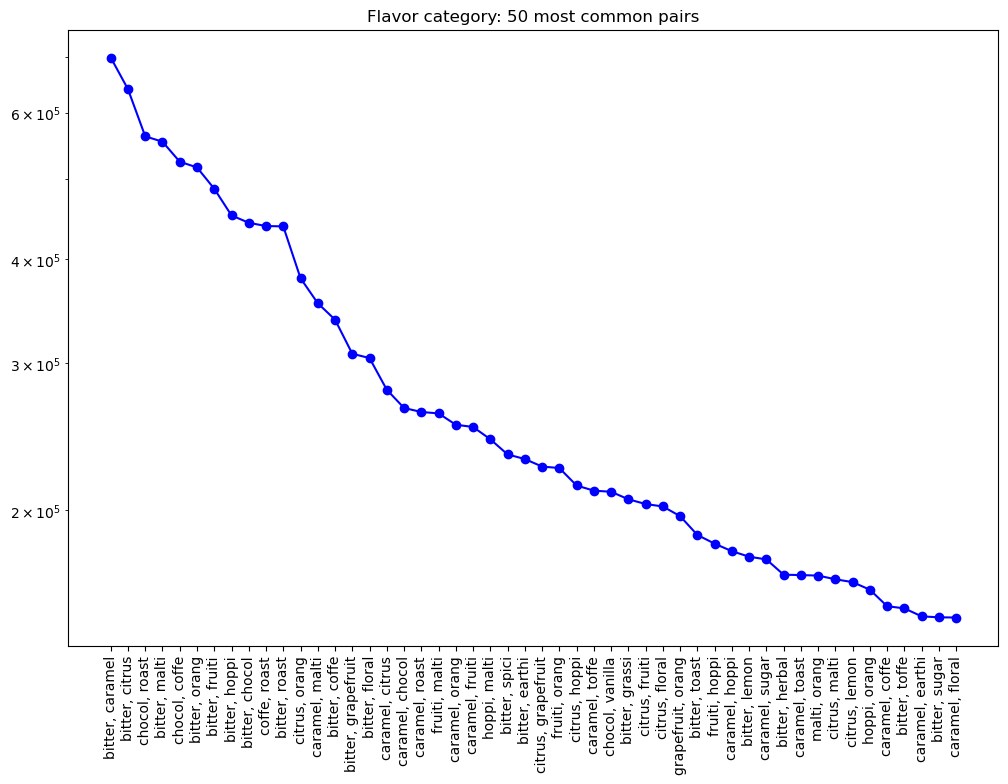

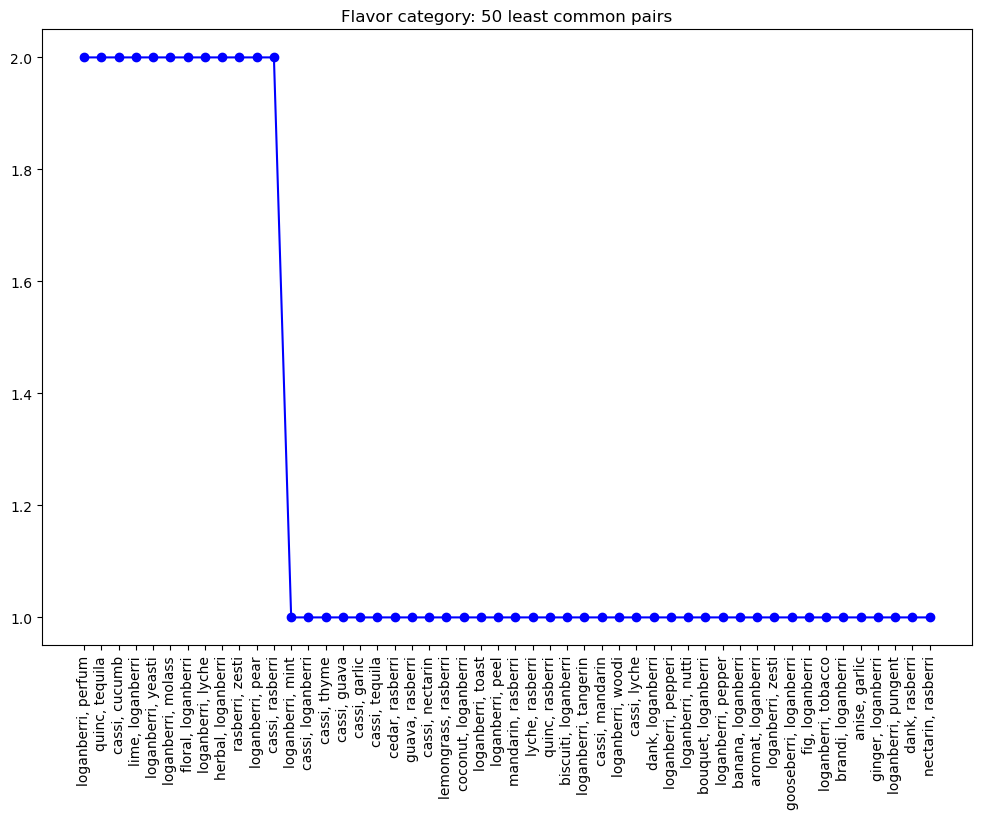

In [16]:
flavor_pair_occ = sorted(pair_occ_cat['flavor'].items(), key=lambda x:x[1] , reverse=True)
print("Total pairs: %d" %(len(flavor_pair_occ)))
print_50(flavor_pair_occ, title='Flavor category: ', first=True, semilog=True)
print_50(flavor_pair_occ, title='Flavor category: ', first=False)

Total pairs: 300


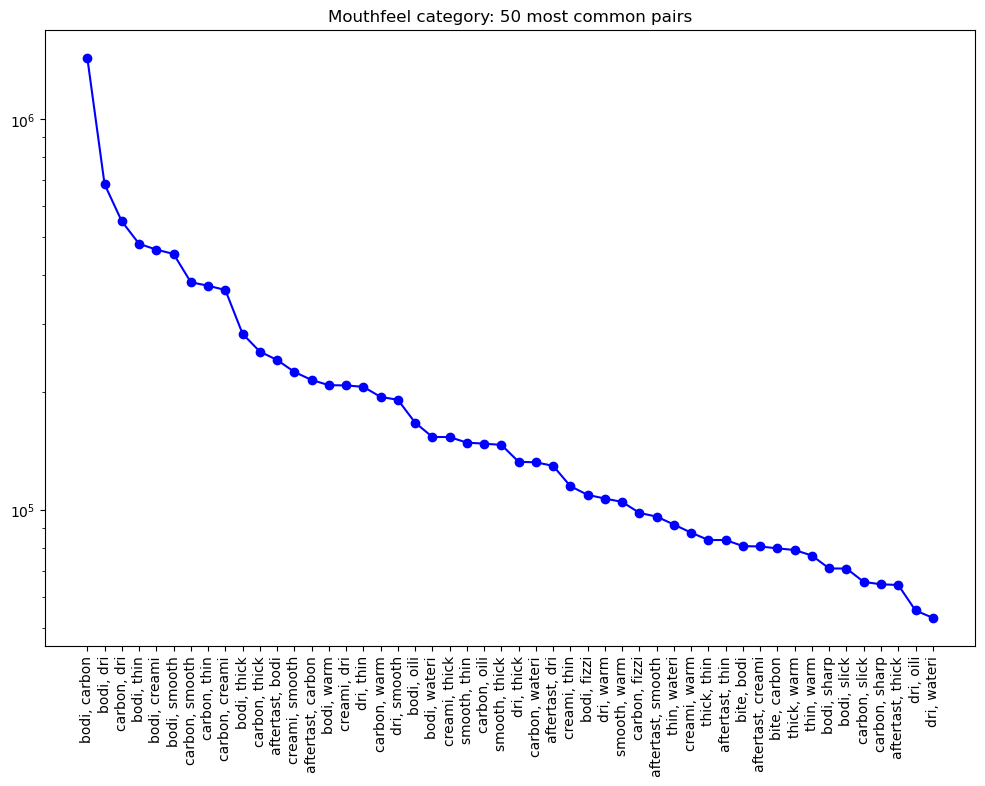

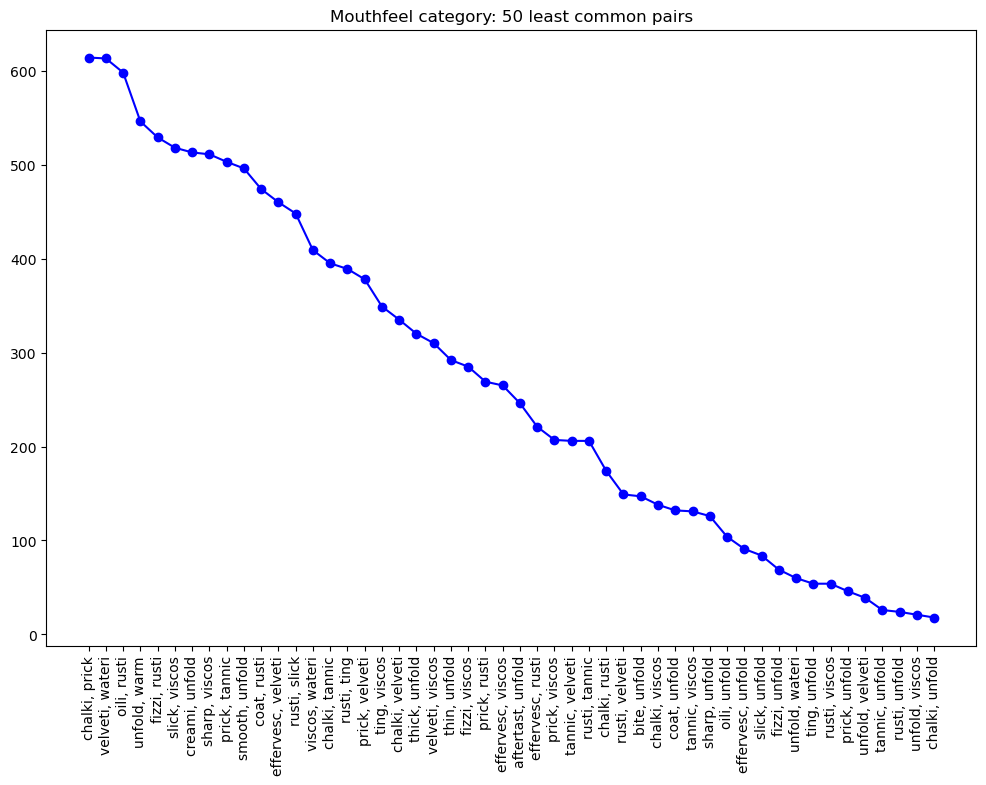

In [17]:
mouthfeel_pair_occ = sorted(pair_occ_cat['mouthfeel'].items(), key=lambda x:x[1] , reverse=True)
print("Total pairs: %d" %(len(mouthfeel_pair_occ)))
title = 'Mouthfeel category: '
print_50(mouthfeel_pair_occ, title=title, first=True, semilog=True)
print_50(mouthfeel_pair_occ, title=title, first=False)